<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/Pr%C3%A1tica_Agrupamento_por_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://img.freepik.com/fotos-gratis/universitaria-e-universitaria-estudando-juntos_23-2149038398.jpg?w=1060&t=st=1703862203~exp=1703862803~hmac=082ff24396de703e8a74df6e7e352bce55c4524452f7d2ad1ada4979093f2393" alt="Alternative text" />

# **Agrupamento por K-Means**

## Objetivo

Nesta prática, vamos entender sobre agrupamento (*clustering*) por [K-means](https://en.wikipedia.org/wiki/K-means_clustering), um método de Unsupervised Learning (Aprendizado Não Supervisionado).

Para a atividade, vamos usar a base de dados [alunos_engcomp.csv.](https://drive.google.com/file/d/1NBapXnTa-TEJIYyH0XsUVdimpxftD4Ap/view?usp=share_link).

A base traz dados sobre alunos de um curso de Engenharia da Computação de uma instituição e possui variáveis como:

* Sexo
* Coeficiente
* Nota do ENEM
* Período
* Escola de origem (se pública ou particular).

O objetivo desta tarefa é entender e discutir o padrão refletido pelos agrupamentos encontrados entre os alunos.

## **Prática**


### **Preparativos**

In [1]:
# IMPORTANDO BIBLIOTECAS

# Bibliotecas básicas
import numpy as np
import pandas as pd

# Gráficos e tabelas
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

# Algoritmo K-means e Elbow
from sklearn.cluster import KMeans

Deve ser feito upload da base de dados para o Google Drive, para uso. Sugere-se que o upload seja feito sempre para a pasta raiz (pasta principal) do Google Drive de cada aluno. Para isso, temos de montar o drive e importá-la corretamente.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Configurando e lendo o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/paulcesarbaruk/Images_dataset/main/alunos_engcomp.csv', delimiter = ';', decimal = ',')

In [4]:
# Verificando as 5 primeiras linhas do DataFrame
print("_"*50)
print("\tPRE VISUALIZACAO DA BASE DE DADOS")
print("_"*50)
print(df.head(),'\n')

__________________________________________________
	PRE VISUALIZACAO DA BASE DE DADOS
__________________________________________________
  Sexo  Coeficiente  Período      Escola    ENEM
0    M       0.7254       10     Pública     613
1    M       0.0738        1     Pública  594,07
2    M       0.4205        2     Pública   599,8
3    M       0.0000        1     Pública  529,83
4    M       0.3770        2  Particular  530,57 



In [5]:
  # Número de linhas e colunas
  num_linhas = df.shape[0]
  num_colunas = df.shape[1]
  print(f"Numero de linhas: {num_linhas} e colunas: {num_colunas}\n")

Numero de linhas: 439 e colunas: 5



### **Tratamento dos dados**

In [6]:
# TRADUZINDO NOTAS

# Alunos que entraram por modalidade específica e independente do ENEM

# Linhas onde o valor é zero é mantido
df['ENEM'] = df['ENEM'].replace(np.nan, '0')

# Linha onde o valor é #VALUE! é substituido por 0
df['ENEM'] = df['ENEM'].replace('#VALUE!', '0')

# Eliminando linha que não informa a escola
index_nao_informado = df[df['Escola'] == 'Não Informado'].index
df = df.drop(index=index_nao_informado)

In [7]:
# ELIMINANDO COLUNAS

# Eliminando colunas de coeficiente e periodo
del df['Coeficiente']
del df['Período']

In [8]:
# ALTERANDO RÓTULOS

# Modifica rótulos textuais 'M' para 0 e 'F' to 1
df["Sexo"] = df["Sexo"].apply(lambda sexo: 0 if sexo == 'M' else 1)

# Modifica rótulos textuais 'Publica' para 0 e 'Particular' para 1
df["Escola"] = df["Escola"].apply(lambda escola: 0 if escola == 'Pública' else 1)

# Altera o ponto decimal ',' para '.'
df["ENEM"] = df["ENEM"].str.replace(',','.')

# Altera a nota do ENEM de str para float
df['ENEM'] = pd.to_numeric(df["ENEM"])

### **Método do cotovelo (*elbow method*)**

O método do cotovelo executa o agrupamento *k-means* no conjunto de dados para um intervalo de valores para $k$ (digamos, de 1 a 10) e, em seguida, para cada valor de $k$, calcula uma pontuação média para todos os agrupamentos.

Ta método plota o valor da função de custo produzida por diferentes valores de $k$.

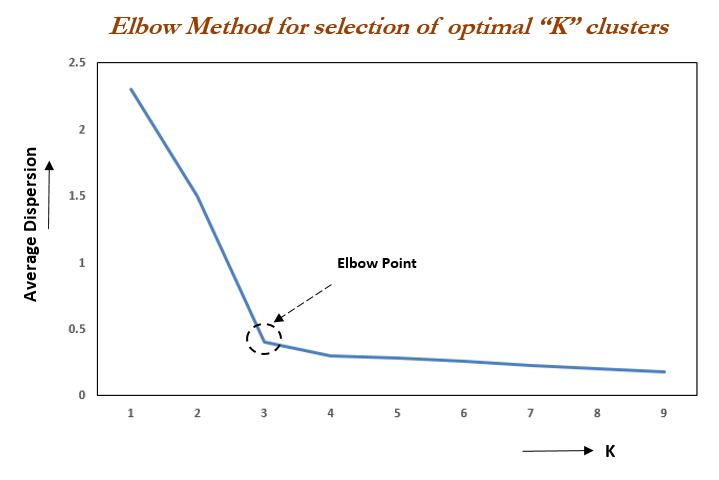

In [9]:
# MÉTODO DO COTOVELO(ELBOW METHOD)
# Utilize-o para justificar a quantidade de agrupamentos.

# Chama-se o construtor do K-Means
# Varia o número de clusters no loop
# inicializa com 'k-means++', pois aumenta a probabilidade
# de escolher centroides distantes um do outro

wcss = [] # Within cluster sum of squares
for i in range(1, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  # Treinando
  kmeans.fit(df[['Escola', 'ENEM']])
  # Guardando no vetor a inércia produzida
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

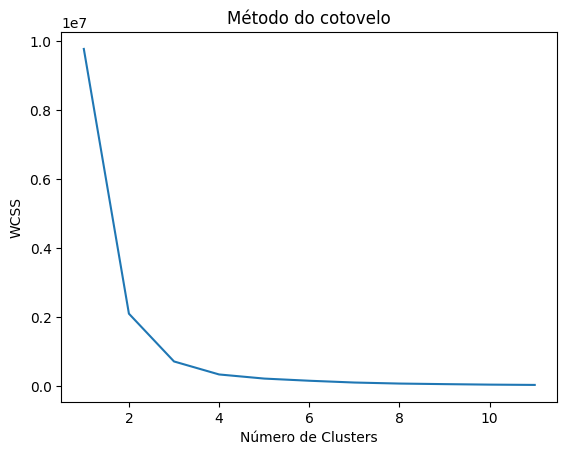

In [10]:
# Plotando o Elbow Method
plt.plot(range(1,12), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

### **Algoritmo K-Means**

O K-Means é um algoritmo do tipo não supervisionado, ou seja, não trabalha com dados rotulados.

De forma sucinta, ele busca encontrar similaridades entre os dados e agrupá-los conforme os números ́de *clusters* passado por um argumento $k$, que no caso específico tem o valor de 3.

Para encontrar tal similaridade, é feito o uso de um método simples e eficiente baseado no conceito de distância.

In [11]:
# Com a análise do método do cotovelo foi escolhido n_clusters = 3

# Modelo
kmeans = KMeans(n_clusters = 3, init="k-means++")

# Treinando o kmeans
kmeans.fit(df[['Escola', 'ENEM']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
# Vendo os rótulos criados
print(f"Labels: {kmeans.labels_}\n")
print(f"Cluster Centers: {kmeans.cluster_centers_}\n")

Labels: [2 0 0 0 0 0 2 2 0 1 2 0 2 0 0 2 2 0 0 2 2 0 2 0 2 0 2 2 2 0 0 2 2 0 0 2 2
 2 0 2 2 1 0 2 2 0 0 2 1 1 2 0 2 2 0 1 0 2 0 0 0 2 0 1 2 0 2 2 2 0 1 2 0 0
 0 0 1 0 0 2 0 0 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 0 0 0 2 0 1 2 2 2
 2 0 2 0 2 0 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 2 0 2 2 2
 2 2 0 2 0 2 2 2 0 0 0 0 2 0 2 2 2 2 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 2 2
 0 0 2 2 1 2 2 2 0 2 0 2 2 0 2 1 0 2 1 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 2 0 2 0 2 2 0 0 0 1 2 0 2 0 2 0 0 0 0 2 0 2 2 1 2 2 2 0 0 2
 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 2 2
 0 0 2 2 0 2 0 1 0 0 2 0 2 0 0 2 0 2 0 0 0 2 0 0 0 2 2 2 0 2 2 2 0 0 0 2 2
 0 2 0 0 2 2 0 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 2 2 2 2 0 2
 2 0 2 2 2 2 2 0 0 0 0 1 2 0 0 0 2 0 2 0 2 2 0 0 0 2 1 2 2 2 2 0 0 2 2 2 0
 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 2 2 2 0 0 0]

Cluster Centers: [[2.57142857e-01 5.51811600e+02]
 [3.80952381e-01 0.00000000e+00]
 [5.20833333e-01 6.6875

In [13]:
# Visualizando os clusters

print("=" * 50)
print("\t\tVISUALIZANDO OS CLUTERS")
print("=" * 50)
for label in np.unique(kmeans.labels_):
  print('LABEL: ', label)
  print(df.iloc[kmeans.labels_ == label])
  print('\n')

		VISUALIZANDO OS CLUTERS
LABEL:  0
     Sexo  Escola    ENEM
1       0       0  594.07
2       0       0  599.80
3       0       0  529.83
4       0       1  530.57
5       0       0  520.89
..    ...     ...     ...
431     0       0  429.30
432     0       1  582.66
436     0       0  513.09
437     1       0  519.19
438     0       0  546.14

[174 rows x 3 columns]


LABEL:  1
     Sexo  Escola  ENEM
9       0       1   0.0
41      0       1   0.0
48      0       0   0.0
49      0       0   0.0
55      0       1   0.0
63      0       0   0.0
70      0       0   0.0
76      0       0   0.0
108     0       0   0.0
118     0       1   0.0
191     0       1   0.0
202     0       0   0.0
205     1       1   0.0
229     0       1   0.0
230     0       0   0.0
240     1       0   0.0
254     0       1   0.0
295     0       0   0.0
306     0       0   0.0
384     0       0   0.0
399     1       0   0.0


LABEL:  2
     Sexo  Escola    ENEM
0       0       0  613.00
6       0       0  728.4

In [14]:
# Incluindo a column clusters
df['Clusters'] = kmeans.labels_
print("=" * 50)
print("\t\tVISUALIZACAO - ADD CLUSTERS")
print("=" * 50)
print(df.head(), '\n')

		VISUALIZACAO - ADD CLUSTERS
   Sexo  Escola    ENEM  Clusters
0     0       0  613.00         2
1     0       0  594.07         0
2     0       0  599.80         0
3     0       0  529.83         0
4     0       1  530.57         0 



### **Visualizando os clusters**

Vamos fazer um gráfico onde o eixo da abscissa representa as notas do ENEM, variando entre 0 e aproximadamente 800.

Além disso, o eixo das ordenadas indica o tipo de escola, no qual o 0 representa escola "Pública" e o 1 representa escola ”Particular”.


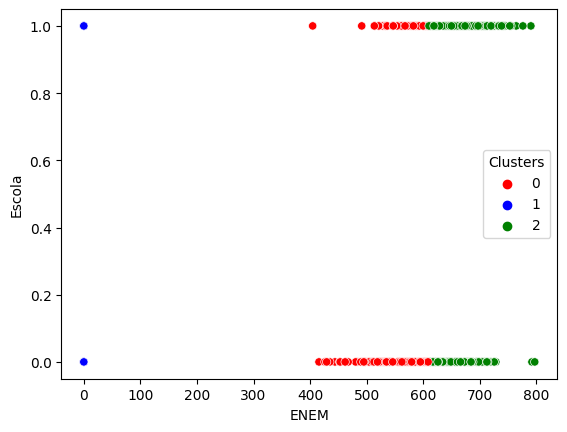

In [15]:
# Plotando o clustering
cmap = matplotlib.colors.ListedColormap(['red', 'blue', 'green'], "")
norm = matplotlib.colors.BoundaryNorm(boundaries=[0, 1, 2, 3], ncolors=3, clip=True)
sns.scatterplot(x='ENEM', y = 'Escola', hue = 'Clusters', data = df, palette = cmap, hue_norm = norm)

plt.show()

De início, tem-se que o eixo da abscissa representa as notas do ENEM, variando entre 0 e aproximadamente 800. Além disso, o eixo das ordenadas indica o tipo de escola, no qual o 0 representa escola "Pública" e  o 1 representa escola ”Particular”.


### **Interpretando o modelo**

Com o processo de clusterização, é possível notar um padrão entre os agrupamentos de alunos de Engenharia da Computação evidenciado pelas 3 cores.

Uma forma de interpretação é que a cor azul representa os alunos que entram por alguma modalidade específica e independente do ENEM, pois suas notas são indicadas como 0 no processamento de dados.

Posteriormente, a cor vermelha simboliza notas baixas/médias. Por fim, a cor verde representa as notas mais altas.

Nota-se que há uma ramificação socioeconômica nos padrões obtidos quando comparada a nota do ENEM com o tipo de escola do aluno.

Os estudantes que adentraram na universidade vindo de escola particular obtiveram um resultado melhor nas notas do ENEM. Eles possuem uma  concentração maior entre notas mais altas quando comparado a estudantes de escolas públicas.


### **Conclusão do estudo**

Em suma, conclui-se que mesmo a escola particular tendo alguns casos de notas baixas/médias, sua grande maioria contém notas maiores que 550 e tendo maior concentração em notas altas, enquanto que a escola pública tem pouca concentração em notas mais altas.

Esses dados permitem afirmar que estudantes de escolas particulares obtêm vantagens em relação a estudantes de escolas públicas quando o assunto é uma vaga em uma universidade pública.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**